In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm

#Question 1 begins here
sns.set()

! if [ ! -e kirby21.csv ] ; \
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi
  
df = pd.read_csv("/content/kirby21.csv")
df.head(5)

,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519
4,5,kirby127a_3_1_ax.img,Mesencephalon,10268,55.0,307.0,230.8583,29.2249,1,1,127,1378295,1268519


In [171]:
#Question 2 begins here
x1 = df[df['roi'] == 'Telencephalon_L'][df['level'] == 1][df['type'] == 1]['volume']
x2 = df[df['roi'] == 'Telencephalon_R'][df['level'] == 1][df['type'] == 1]['volume']
y1 = df[df['roi'] == 'CSF'][df['level'] == 1][df['type'] == 1]['volume']
     
voldat = pd.DataFrame(list(zip(x1,x2,y1)),columns = ['TL_V', 'TR_V','CSF_V'])  
voldat = sm.tools.add_constant(voldat)

results = smf.ols('CSF_V ~ TL_V + TR_V', data = voldat).fit()
print(results.summary2())


                    Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.170     
Dependent Variable:   CSF_V             AIC:                 453.0221  
Date:                 2019-09-28 01:58  BIC:                 456.0093  
No. Observations:     20                Log-Likelihood:      -223.51   
Df Model:             2                 F-statistic:         2.941     
Df Residuals:         17                Prob (F-statistic):  0.0800    
R-squared:            0.257             Scale:               3.5081e+08
-----------------------------------------------------------------------
             Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------
Intercept -22868.5515 50978.2412 -0.4486 0.6594 -130423.2389 84686.1360
TL_V           1.9498     1.0920  1.7854 0.0920      -0.3542     4.2537
TR_V          -1.7003     1.0416 -1.6324 0.1210      -3.8979     0.4973
------------

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#Exercise 1 Interpretation of coefficients
The intercept coefficient is the starting point for our model. However, as it is negative, I would not attribute any physical meaning to it in terms of volume.

For the coefficient for the Telencephalon_L Volume regressor: there is an expected change of 1.9498 in the outcome of admittance (CSF Volume) for a 1 unit change in TL_V score with all the other regressors held constant.

For the coefficient for the Telencephalon_R Volume regressor: there is an expected change of -1.7003 in the outcome of admittance (CSF Volume) for a 1 unit change in TR_V score with all the other regressors held constant (the negative implies that TR_V decreases the values predicted for CSF Volume).

In [163]:
#Question 2 begins here
! if [ ! -e binary.csv ]; \
then wget https://stats.idre.ucla.edu/stat/data/binary.csv; \
fi;
    
dat = pd.read_csv("binary.csv")
dat.head(5)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [164]:
#part a
trainFraction = .75
sample = np.random.uniform(size = len(dat)) < trainFraction
trainingDat = dat[sample]
testingDat = dat[~sample]

xtrain = trainingDat[['gre','gpa','rank']]
ytrain = trainingDat[['admit']]
xtest = testingDat[['gre','gpa','rank']]
ytest = testingDat[['admit']]


model = sm.discrete.discrete_model.Logit(ytrain, xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.585189
         Iterations 5


In [165]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  300
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Sat, 28 Sep 2019   Pseudo R-squ.:                 0.05065
Time:                        01:50:36   Log-Likelihood:                -175.56
converged:                       True   LL-Null:                       -184.92
Covariance Type:            nonrobust   LLR p-value:                 8.562e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0013      0.001      1.101      0.271      -0.001       0.004
gpa           -0.0457      0.228     -0.200      0.841      -0.493       0.402
rank          -0.5830      0.136     -4.279      0.000      -0.850      -0.316
==============================================================================
"""

#Exercise 2 interpretation of logistic regression coefficients
for the coefficient for the gre regressor: there is an expected change of 0.0010 in the outcome of admittance for a 1 unit change in gre score with all the other regressors held constant.

for the coefficient for the gpa regressor: there is an expected change of 0.1231 in the outcome of admittance for a 1 unit change in gpa score with all the other regressors held constant.

for the coefficient for the rank regressor: there is an expected change of -0.7383 in the outcome of admittance for a 1 unit change in rank score with all the other regressors held constant (the negative implies that rank works against you).

[0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.36, 0.37, 0.42, 0.44, 0.48, 0.49, 0.49, 0.48, 0.49, 0.5, 0.5, 0.54, 0.56, 0.58, 0.61, 0.61, 0.61, 0.59, 0.58, 0.61, 0.61, 0.65, 0.64, 0.67, 0.69, 0.71, 0.69, 0.67, 0.68, 0.68, 0.67, 0.67, 0.67, 0.67, 0.68, 0.68, 0.65, 0.66, 0.66, 0.65, 0.67, 0.66, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65]


Text(0, 0.5, 'accuracy')

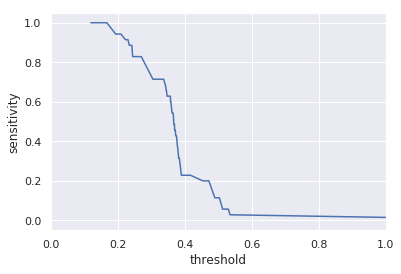

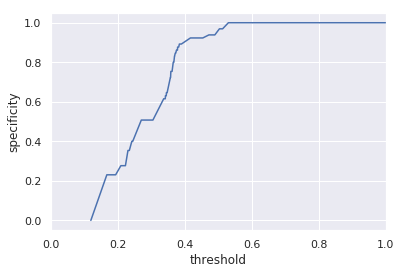

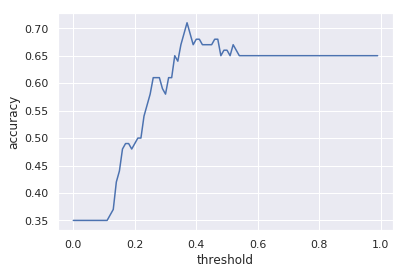

In [166]:
phatTesting = model.predict(xtest)

fpr, tpr, threshold = skl.metrics.roc_curve(ytest, phatTesting)

sensitivity = tpr
specificity = 1 - fpr

thr = np.arange(0,1,0.01)
length = np.arange(0,len(ytest))
phatTesting = np.asarray(phatTesting)

acc_list = []


for t in thr:
  predictions = []
  for l in length:
    if phatTesting[l] > t:
      predictions.append(1)
    else:
      predictions.append(0)
  values = skl.metrics.accuracy_score(ytest,predictions)
  acc_list.append(values)

print(acc_list)



plt.figure()
plt.plot(threshold,sensitivity)
plt.xlabel('threshold')
plt.ylabel('sensitivity')
plt.xlim(0,1)

plt.figure()
plt.plot(threshold,specificity)
plt.xlabel('threshold')
plt.ylabel('specificity')
plt.xlim(0,1)

plt.figure()
plt.plot(thr,acc_list)
plt.xlabel('threshold')
plt.ylabel('accuracy')

In [167]:
#Question 3
#retrieved from https://www.kaggle.com/ronitf/heart-disease-uci/version/1

! if [ ! -e heart.csv ]; \
then wget https://raw.githubusercontent.com/krbyktl/Biomedical-Data-Science/master/heart.csv; \
fi;

heart = pd.read_csv("heart.csv")
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


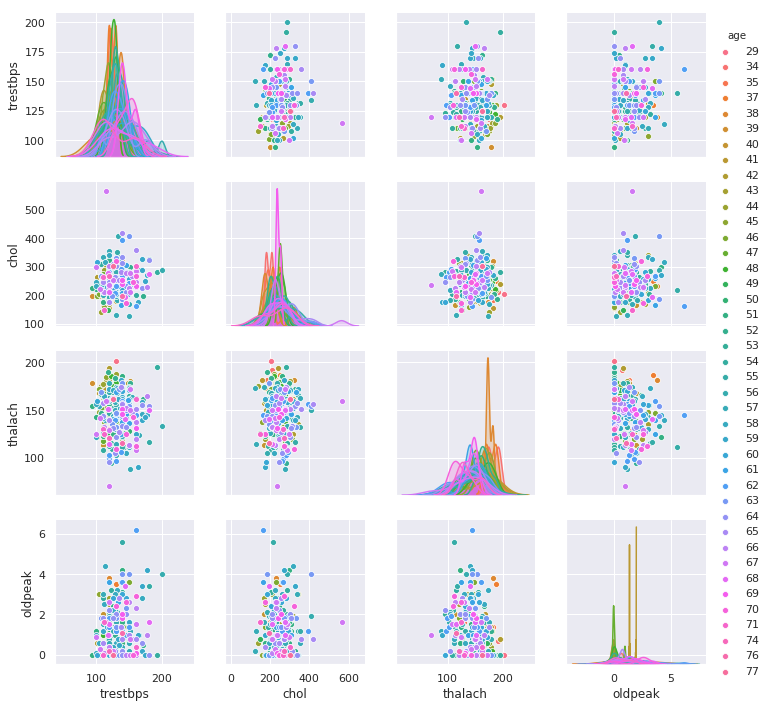

In [168]:
sns.pairplot(heart, vars = ['trestbps', 'chol', 'thalach','oldpeak'], hue = 'age')

In [169]:
trestbps = heart['trestbps']
chol = heart['chol']
age = heart['age']
sex = heart['sex']


     
heartdata = pd.DataFrame(list(zip(trestbps,chol,age,sex)),columns = ['trestbps', 'chol','age','sex'])  

results = smf.ols('sex ~ trestbps + chol + age', data = heart).fit()



xtrain = heartdata[['trestbps','chol','age']]
ytrain = heartdata[['sex']]


model = sm.discrete.discrete_model.Logit(ytrain, xtrain).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.620367
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    sex   No. Observations:                  303
Model:                          Logit   Df Residuals:                      300
Method:                           MLE   Df Model:                            2
Date:                Sat, 28 Sep 2019   Pseudo R-squ.:                0.006551
Time:                        01:51:06   Log-Likelihood:                -187.97
converged:                       True   LL-Null:                       -189.21
Covariance Type:            nonrobust   LLR p-value:                    0.2895
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trestbps       0.0129      0.006      2.240      0.025       0.002       0.024
chol          -0.0049      0.002     -2.095      0.036      -0.009      -0.000
age            0.0045      0.013      0.335      0.737      -0.022       0.031
==============================================================================
"""